<a href="https://colab.research.google.com/github/Samarth26/Energy-Performance-of-the-Building-Sector-in-Singapore/blob/main/MH3511_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminary Data Cleaning

In [ ]:
energy = read.csv("listing-of-building-energy-performance-data-for-commercial-buildings.csv", header = T)

energy = subset(energy, select = -c(buildingname, buildingaddress, voluntarydisclosure) )

energy = energy[!is.na(energy$buildingtype),]
energy = energy[!is.na(energy$greenmarkstatus),]
energy = energy[!is.na(energy$buildingsize),]
energy = energy[!is.na(energy$grossfloorarea),]
energy = energy[!is.na(energy$X2017energyuseintensity),]
energy = energy[!is.na(energy$X2018energyusintensity),]

onlyrating = energy[!is.na(energy$greenmarkrating),] 
onlyrating = subset(onlyrating, greenmarkrating!= 'Legislated') 
notrating= energy[is.na(energy$greenmarkrating),] 
energy=rbind(onlyrating,notrating)

energy$ID <- seq.int(nrow(energy))

energy

,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,buildingsize,grossfloorarea,X2017energyuseintensity,X2018energyusintensity,ID
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>
3,Retail,Yes,Platinum,2018,Large,"65,640",382,365,1
4,Office,Yes,Platinum,2018,Large,"102,356",212,183,2
5,Office,Yes,Platinum,2017,Large,"15,769",203,181,3
6,Retail,Yes,Gold,2015,Large,"28,938",431,396,4
18,Office,Yes,Platinum,2015,Large,"19,765",127,132,5
27,Office,Yes,GoldPlus,2009,Small,"5,030",171,165,6
38,Retail,Yes,Gold,2016,Large,"139,853",531,511,7
45,Office,Yes,Platinum,2017,Large,"26,137",209,134,8
46,Office,Yes,Platinum,2014,Large,"32,034",134,138,9


ID is not a variable of interest, just used for our cleaning purposes

## Description and Cleaning of the Dataset

### Summary Statistics for the Main Variable of Interest : 2018 Energy Use Intensity

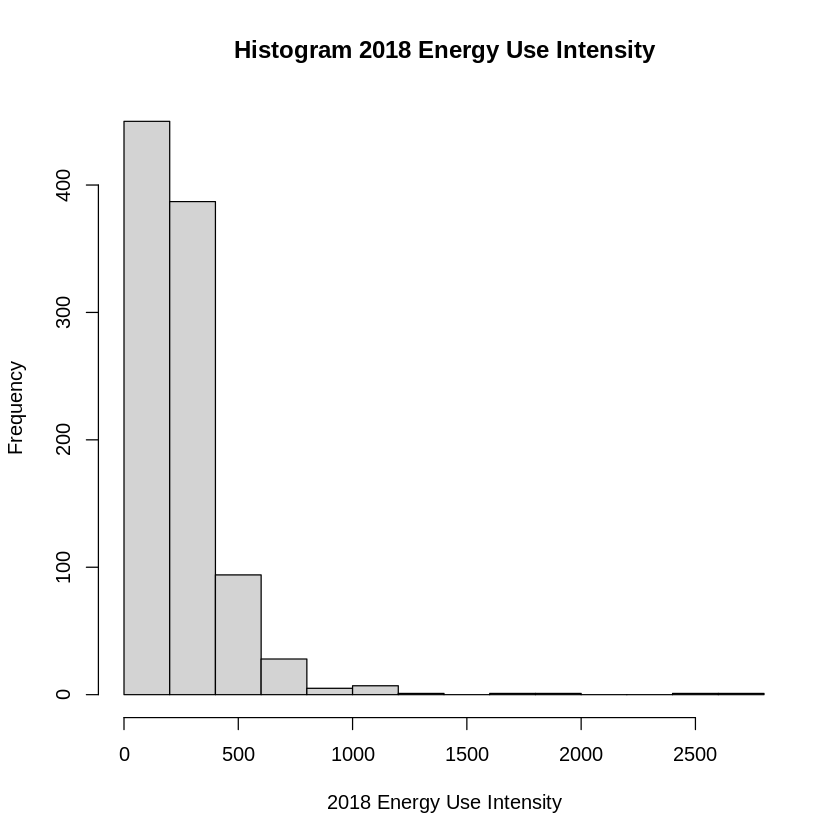

In [ ]:
hist(energy$X2018energyusintensity, main = "Histogram 2018 Energy Use Intensity", xlab = "2018 Energy Use Intensity")

performing a log transform to reduce skewness

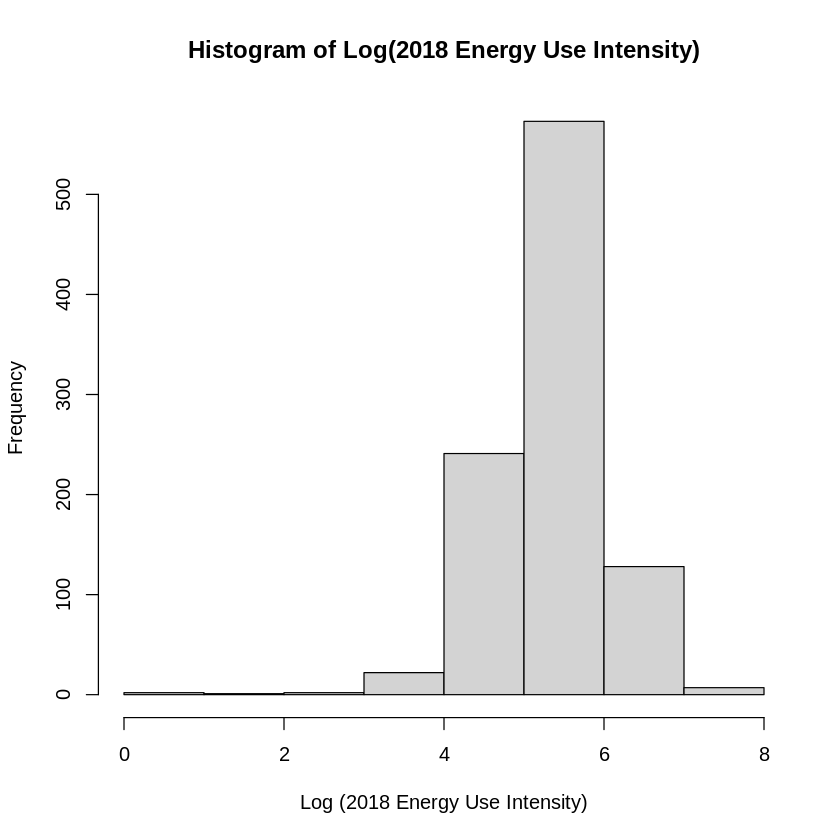

In [ ]:
hist(log(energy$X2018energyusintensity), main = "Histogram of Log(2018 Energy Use Intensity)", xlab = "Log (2018 Energy Use Intensity)")

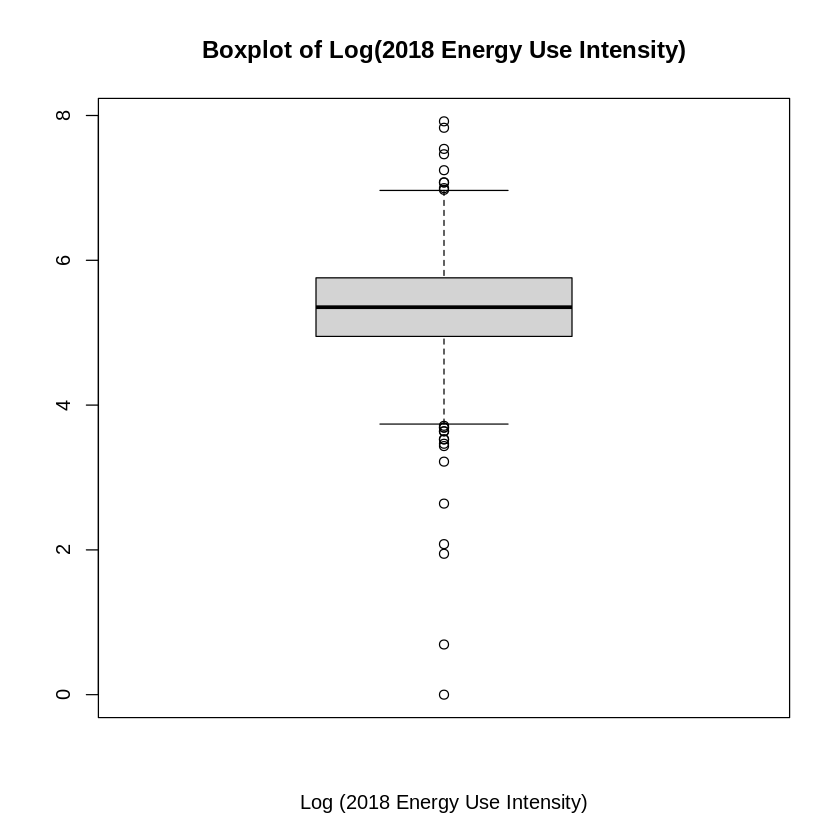

In [ ]:
boxplot(log(energy$X2018energyusintensity), main = "Boxplot of Log(2018 Energy Use Intensity)", xlab = "Log (2018 Energy Use Intensity)")

Removing few values with Energy Use Intensity extremely high even though they are Green Mark Buildings and few values with Energy Use Intensity extremely low even though they are not Green Mark Buildings. Approximately 2.07% of the data

In [ ]:
energy1 = subset(energy, log(energy$X2018energyusintensity)<6.9 & energy$greenmarkstatus == "Yes")
energy2 = subset(energy, log(energy$X2018energyusintensity)>3.82 & energy$greenmarkstatus == "No" )
energy = merge(energy1, energy2, all=T)
energy = subset(energy, select = -c(ID) )

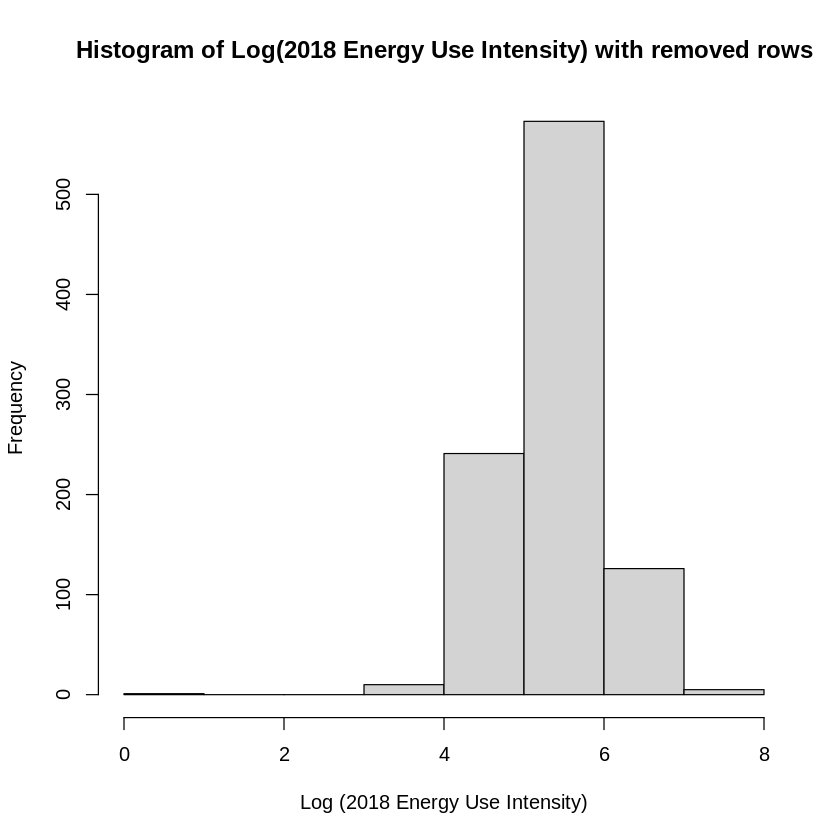

In [ ]:
hist(log(energy$X2018energyusintensity), main = "Histogram of Log(2018 Energy Use Intensity) with removed rows", xlab = "Log (2018 Energy Use Intensity)")


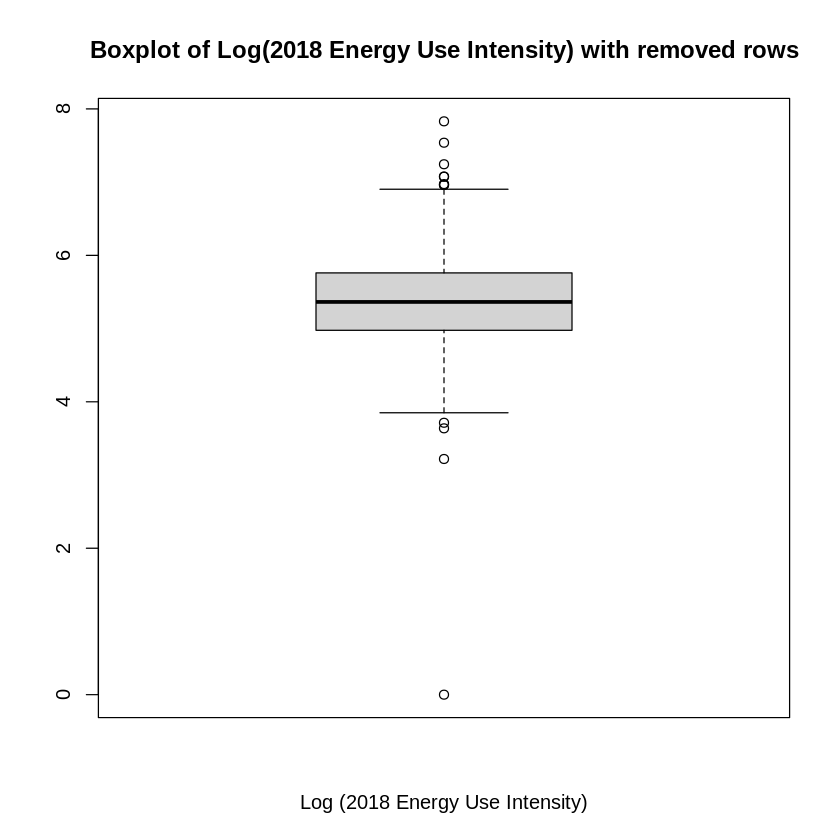

In [ ]:
boxplot(log(energy$X2018energyusintensity), main = "Boxplot of Log(2018 Energy Use Intensity) with removed rows", xlab = "Log (2018 Energy Use Intensity)")

In [ ]:
summary(energy$X2018energyusintensity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   145.0   213.5   258.4   317.2  2516.0 

### Summary Statistics for other variables

#### Building Type

In [ ]:
table(energy$buildingtype)


                          Community Hospital 
                                           4 
General Hospital/ Specialist Centre (Public) 
                                           8 
                                       Hotel 
                                         210 
                                         ITE 
                                           3 
                           Mixed Development 
                                          44 
                                Nursing Home 
                                          27 
                                      Office 
                                         439 
                                  Polyclinic 
                                          10 
                                 Polytechnic 
                                           7 
                              Private Clinic 
                                           8 
                             Private College 
                                 

Since there is only one row with TCM Clinic we decide to remove it

In [ ]:
energy = subset(energy, buildingtype!= 'TCM Clinic')

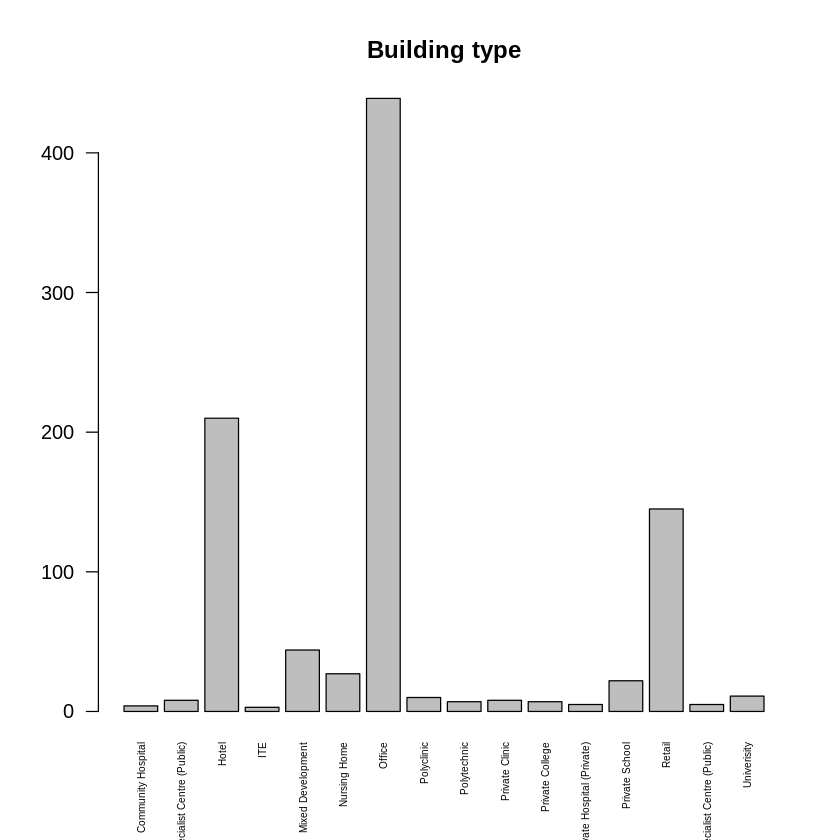

In [ ]:
barplot(table(energy$buildingtype), las = 2,
        cex.names = 0.5, main = 'Building type')

#### Green Mark Status

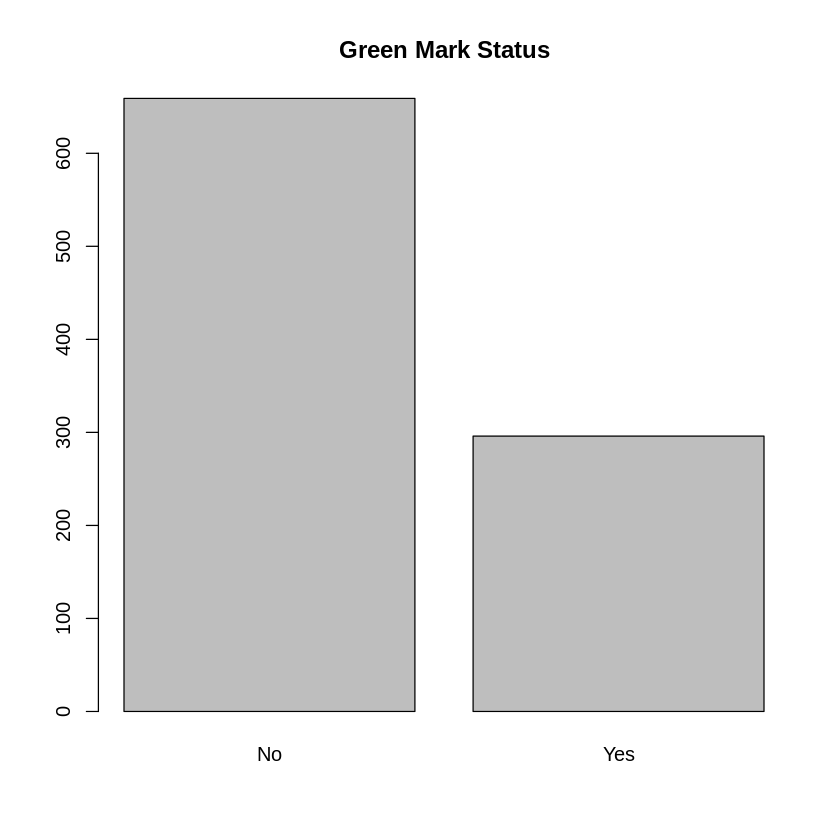

In [ ]:
barplot(table(energy$greenmarkstatus),main = "Green Mark Status")

#### Green Mark Rating

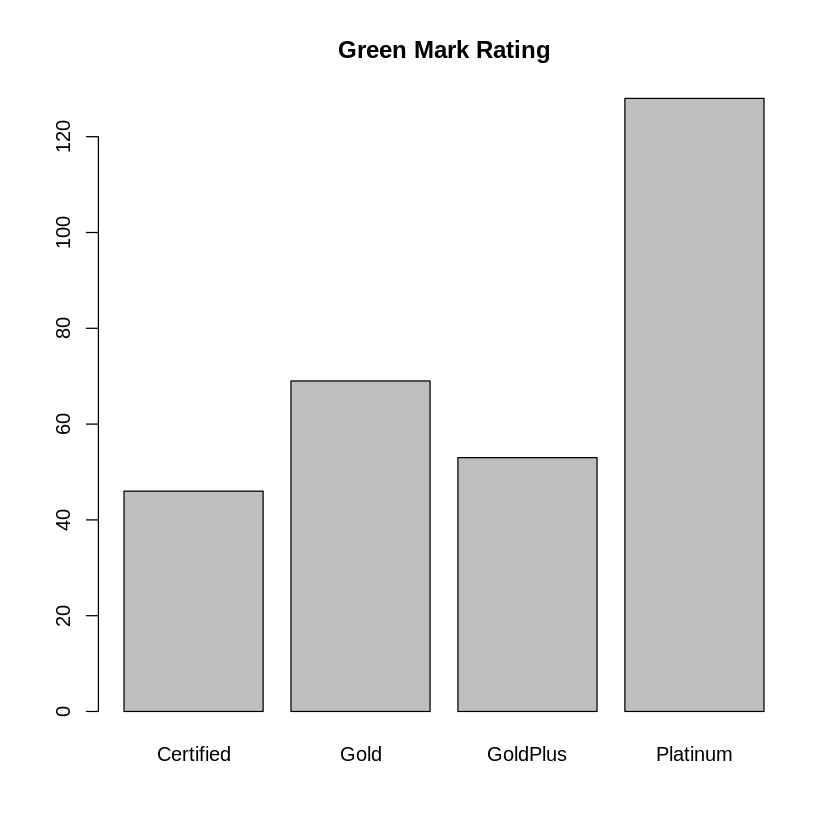

In [ ]:
barplot(table(energy$greenmarkrating),main = "Green Mark Rating")

#### Green Mark Year Award

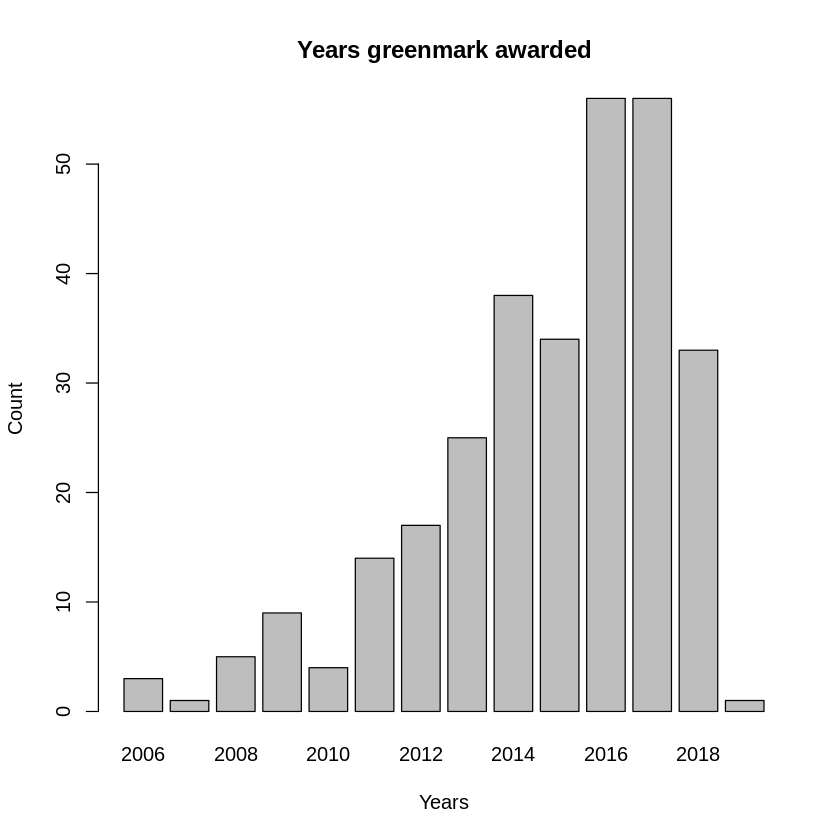

In [ ]:
barplot(table(energy$greenmarkyearaward),main = "Years greenmark awarded", xlab = "Years", ylab = "Count")

#### Building Size

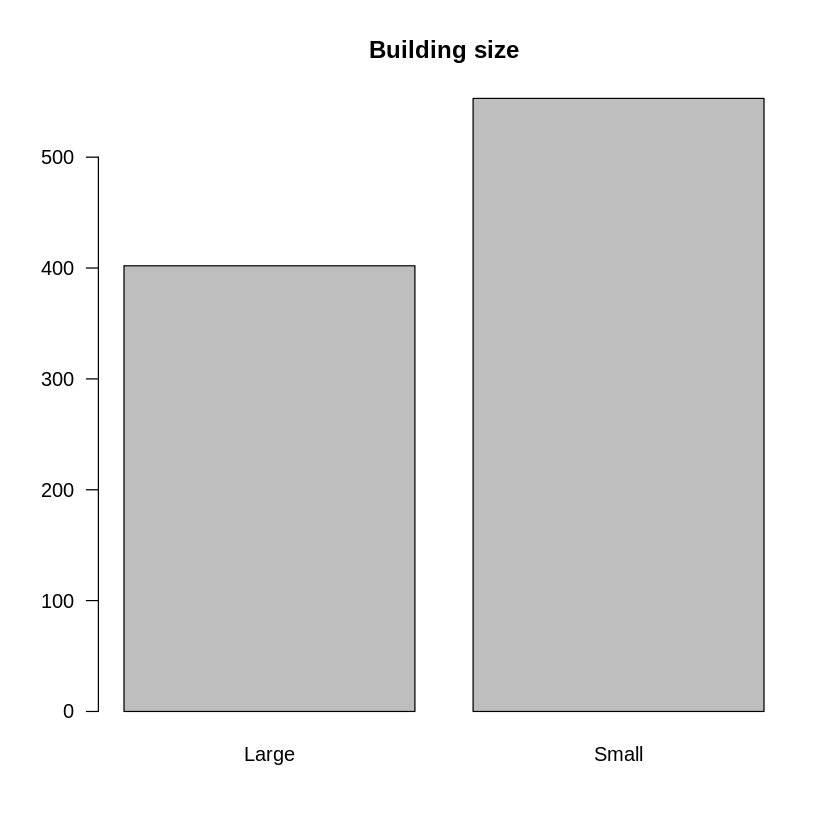

In [ ]:
barplot(table(energy$buildingsize), las = 1,
        cex.names = 1, main = 'Building size')

#### Gross Floor Area

Converting the column gross floor area to a numeric column

In [ ]:
energy$grossfloorarea <- lapply(energy$grossfloorarea, gsub, pattern = ",", replacement = "", fixed = TRUE)
energy$grossfloorarea <- as.integer(energy$grossfloorarea)

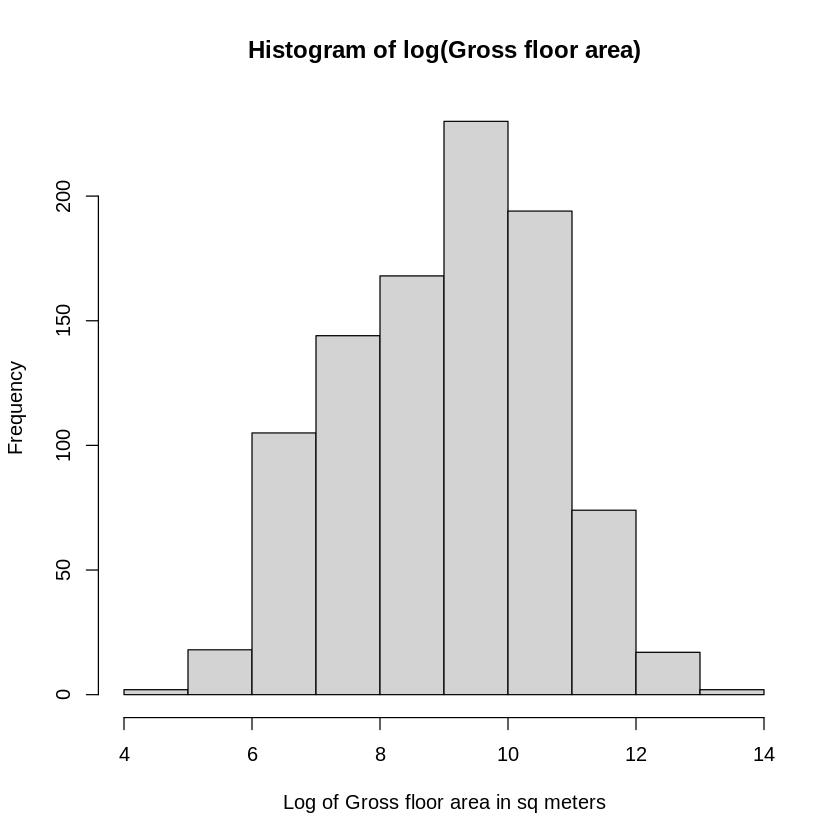

In [ ]:
hist(log(energy$grossfloorarea), main = "Histogram of log(Gross floor area)", xlab = "Log of Gross floor area in sq meters" )

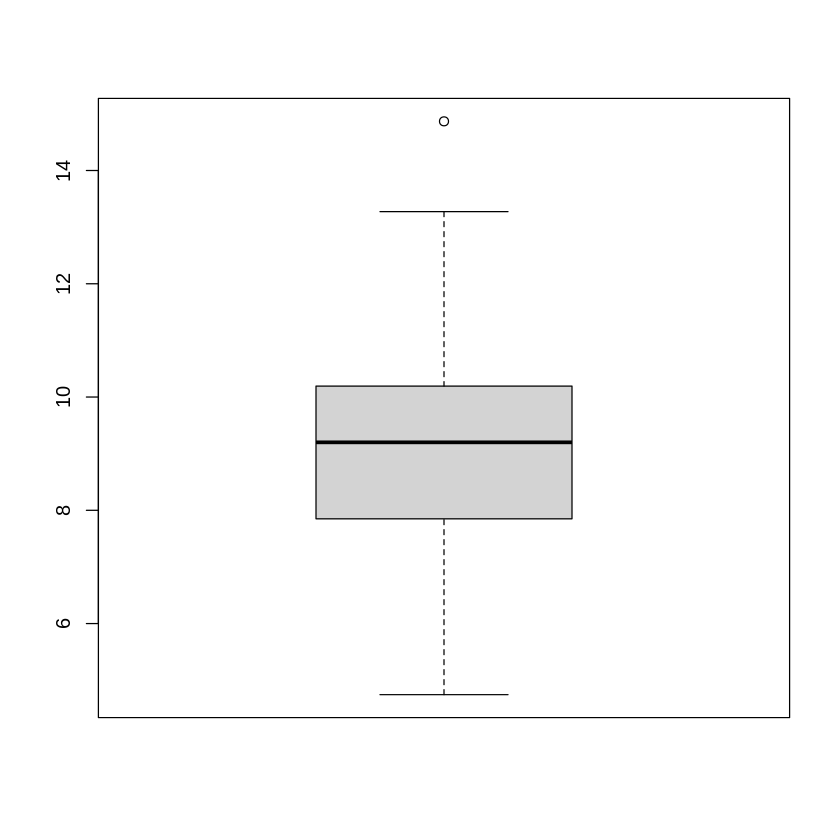

In [ ]:
boxplot(log(energy$grossfloorarea))

Removing the outlier

In [ ]:
energy <- energy[log(energy$grossfloorarea)<14 , ]

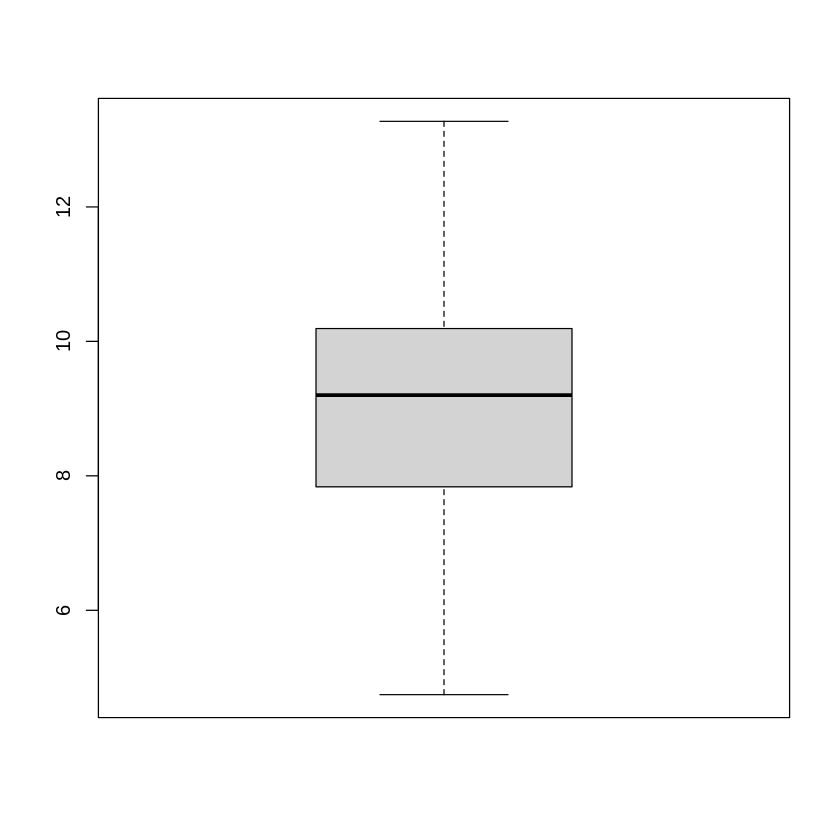

In [ ]:
boxplot(log(energy$grossfloorarea))

#### 2017 Energy Use Intensity

In [ ]:
energyuse17=c(energy$X2017energyuseintensity)
logenergy17=log(energyuse17)

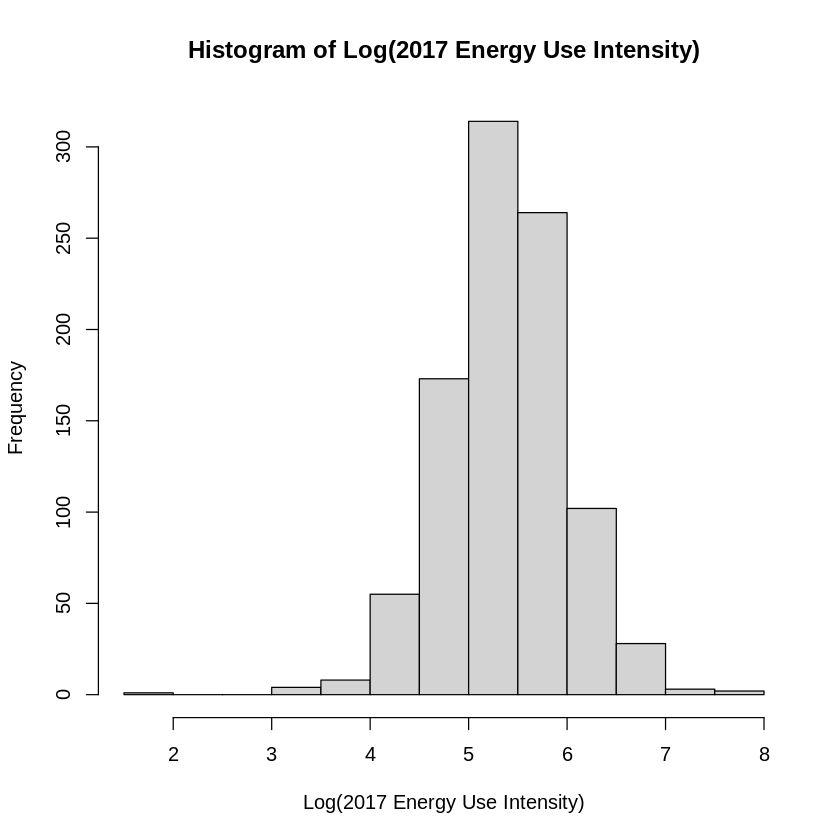

In [ ]:
hist(logenergy17, main = "Histogram of Log(2017 Energy Use Intensity)", xlab = "Log(2017 Energy Use Intensity)")

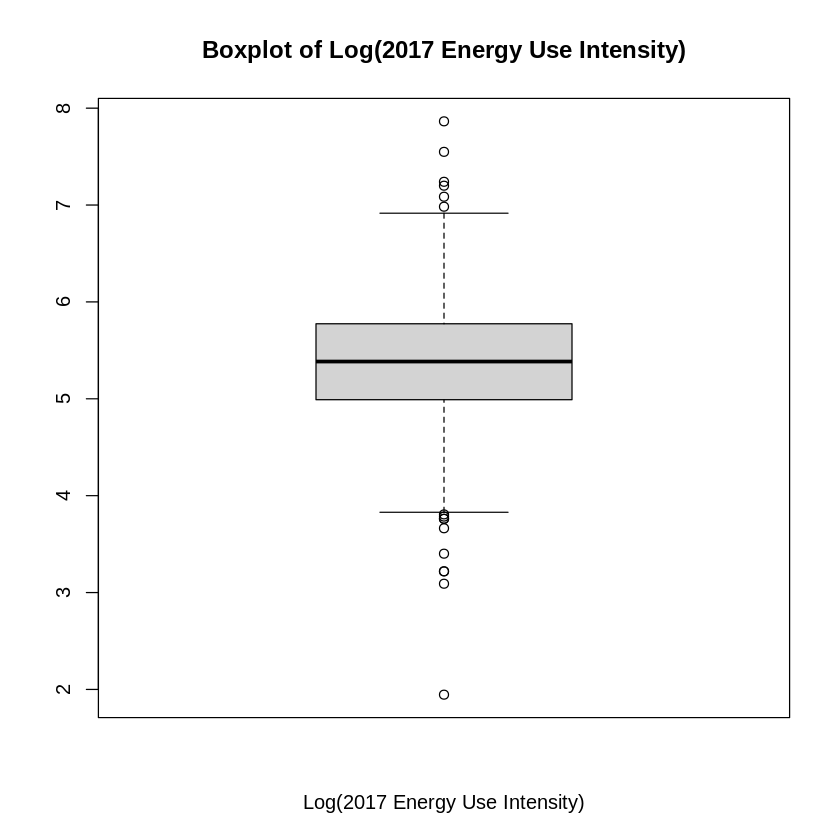

In [ ]:
boxplot(logenergy17, main = "Boxplot of Log(2017 Energy Use Intensity)", xlab = "Log(2017 Energy Use Intensity)")

## Statistical Analysis

### Correlations between log(X2018energyusintensity) and other Continous Variables 

In [ ]:
install.packages("PerformanceAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



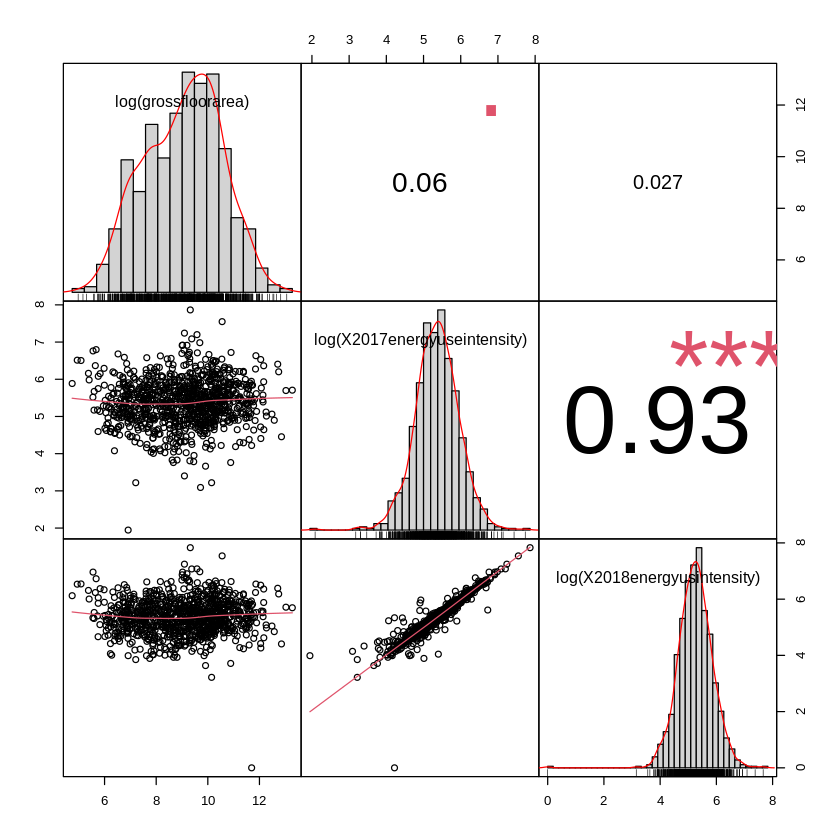

In [ ]:
library("PerformanceAnalytics")
correnergy = energy[, c('grossfloorarea', 'X2017energyuseintensity', 'X2018energyusintensity')]
correnergy = log(correnergy)
colnames(correnergy) = c('log(grossfloorarea)','log(X2017energyuseintensity)','log(X2018energyusintensity)')
chart.Correlation(correnergy, histogram=TRUE, pch=19)

### Statistical Tests

#### Does energy use intensity reduce before greenmark status is awarded in 2018?

In [ ]:
energy2018 <- subset(energy, energy$greenmarkyearaward == 2018 | is.na(energy$greenmarkyearaward) )
energy2018$energyuseintensitychange <- (energy2018$X2017energyuseintensity - energy2018$X2018energyusintensity)
energy2018$energyusedecrease <- ifelse(energy2018$energyuseintensitychange > 0 ,"Yes","No")

In [ ]:
chisq.test(energy2018$greenmarkstatus, energy2018$energyusedecrease, correct = FALSE )


	Pearson's Chi-squared test

data:  energy2018$greenmarkstatus and energy2018$energyusedecrease
X-squared = 7.5698, df = 1, p-value = 0.005936


In [ ]:
energy2018$greenmarkstatus <- ifelse(energy2018$greenmarkstatus=="Yes",1,0)
energy2018$energyusedecrease <- ifelse(energy2018$energyusedecrease=="Yes",1,0)

In [ ]:
cor.test(energy2018$greenmarkstatus, energy2018$energyusedecrease)


	Pearson's product-moment correlation

data:  energy2018$greenmarkstatus and energy2018$energyusedecrease
t = 2.7625, df = 690, p-value = 0.005889
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03029544 0.17773427
sample estimates:
      cor 
0.1045895 


#### Relation between energy use intensity (X2018energyusintensity) and building size (buildingsize)



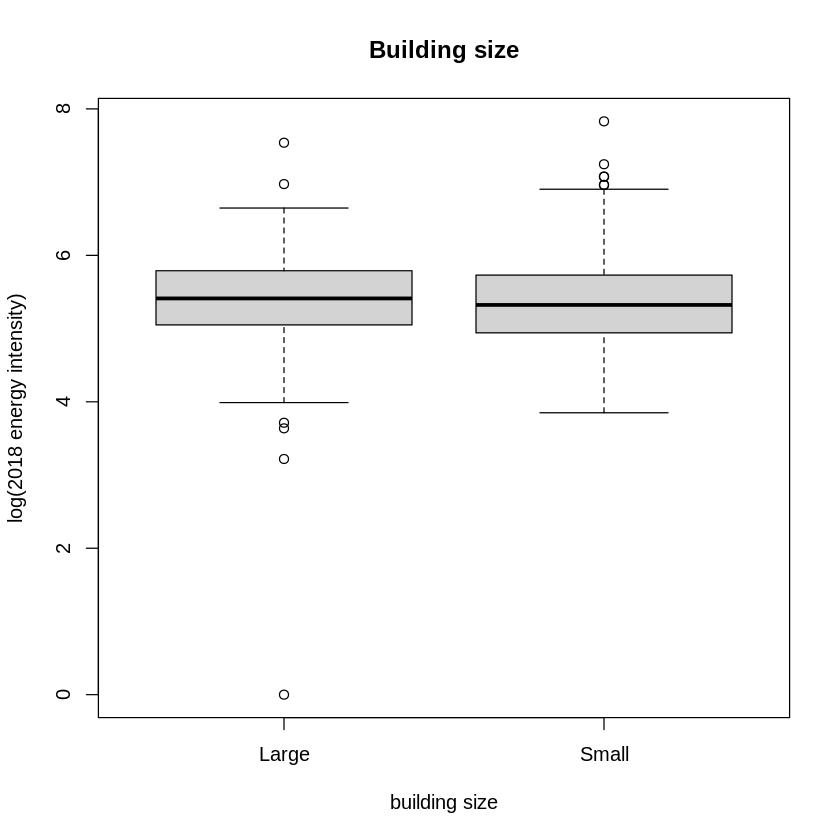

In [ ]:
boxplot(log(energy$X2018energyusintensity) ~ energy$buildingsize, ylab = 'log(2018 energy intensity)', xlab = 'building size', main = 'Building size')

In [ ]:
var.test(log(energy$X2018energyusintensity) ~ energy$buildingsize)


	F test to compare two variances

data:  log(energy$X2018energyusintensity) by energy$buildingsize
F = 1.0012, num df = 400, denom df = 552, p-value = 0.986
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8355021 1.2029088
sample estimates:
ratio of variances 
          1.001168 


In [ ]:
t.test(log(energy$X2018energyusintensity) ~ energy$buildingsize, var.equal = T)


	Two Sample t-test

data:  log(energy$X2018energyusintensity) by energy$buildingsize
t = 1.3418, df = 952, p-value = 0.18
alternative hypothesis: true difference in means between group Large and group Small is not equal to 0
95 percent confidence interval:
 -0.02528766  0.13462046
sample estimates:
mean in group Large mean in group Small 
           5.398206            5.343540 


#### Relation between energy use intensity in 2018 (X2018energyusintensity) and gross floor area (grossfloorarea)

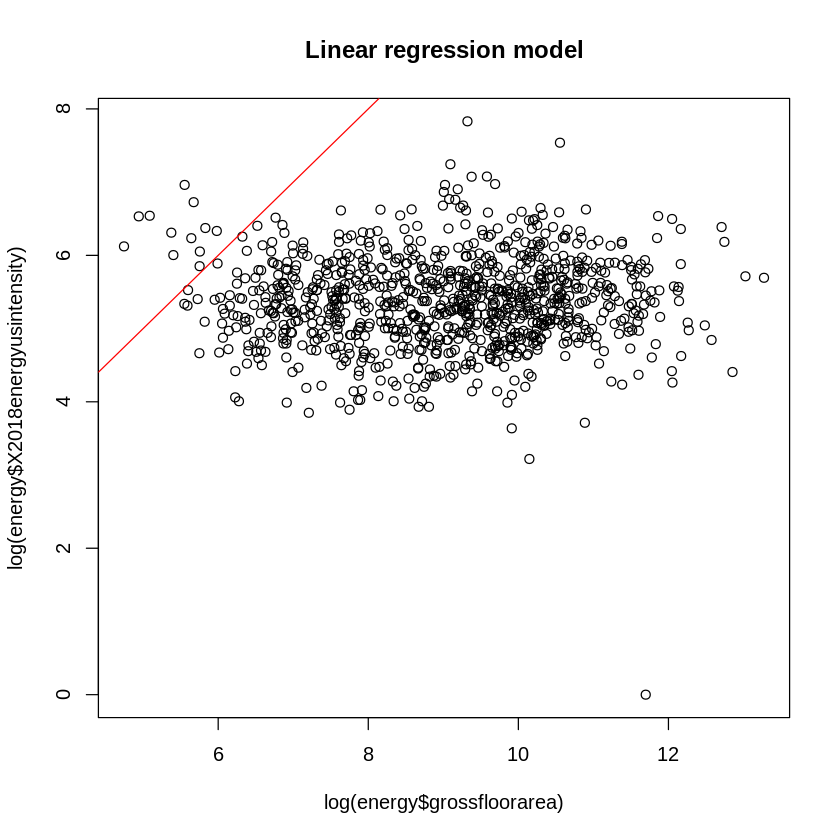

In [ ]:
plot(log(energy$grossfloorarea),log(energy$X2018energyusintensity), main="Linear regression model") 
abline(0,1, col="red")

In [ ]:
energy$grossfloorarea <- as.numeric(gsub(",","",energy$grossfloorarea)) 
lmodel<- lm(log(X2018energyusintensity)~log(grossfloorarea), data = energy) 
summary(lmodel) 



Call:
lm(formula = log(X2018energyusintensity) ~ log(grossfloorarea), 
    data = energy)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3950 -0.3890 -0.0039  0.3892  2.4608 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.26989    0.11771  44.769   <2e-16 ***
log(grossfloorarea)  0.01070    0.01284   0.833    0.405    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6215 on 952 degrees of freedom
Multiple R-squared:  0.0007286,	Adjusted R-squared:  -0.000321 
F-statistic: 0.6942 on 1 and 952 DF,  p-value: 0.405


#### Relation between Energy Use Intensity (X2018energyuseintensity) and Green Mark Rating (greenmarkrating)

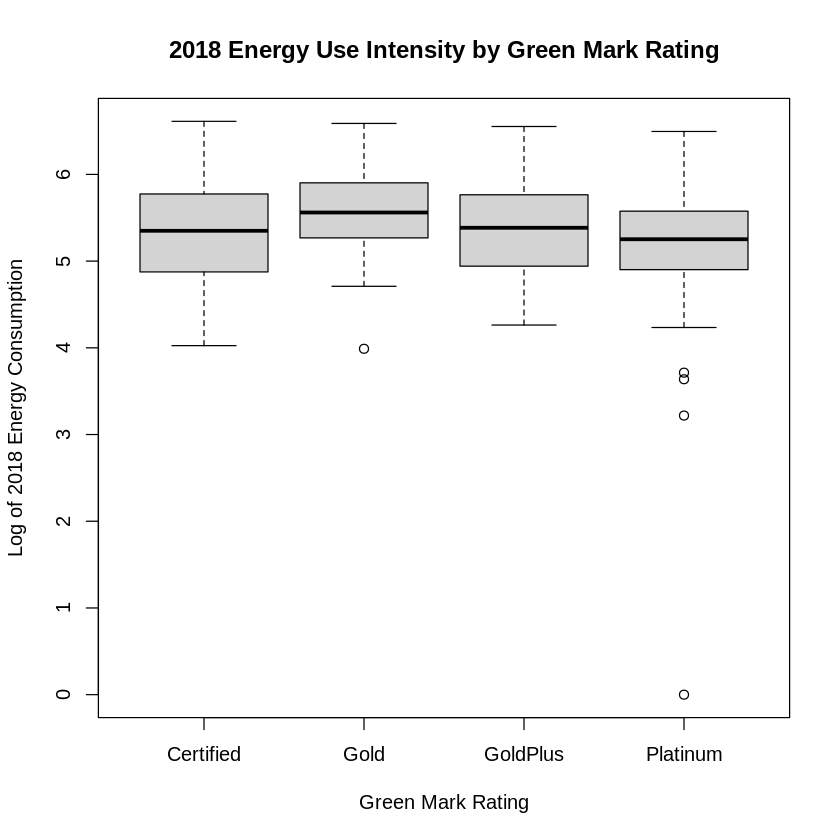

In [ ]:
onlyrating = energy[!is.na(energy$greenmarkrating),] 
onlyrating = subset(onlyrating, greenmarkrating!= 'Legislated') 
boxplot(log(onlyrating$X2018energyusintensity)~onlyrating$greenmarkrating,names = c("Certified","Gold","GoldPlus","Platinum"), main = "2018 Energy Use Intensity by Green Mark Rating",xlab = "Green Mark Rating", ylab = "Log of 2018 Energy Consumption")

In [ ]:
summary(aov(log(onlyrating$X2018energyusintensity) ~ factor(onlyrating$greenmarkrating)))

                                    Df Sum Sq Mean Sq F value  Pr(>F)   
factor(onlyrating$greenmarkrating)   3   5.34   1.779   4.361 0.00505 **
Residuals                          291 118.72   0.408                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
pairwise.t.test(log(onlyrating$X2018energyusintensity),onlyrating$greenmarkrating,p.adjust.method = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  log(onlyrating$X2018energyusintensity) and onlyrating$greenmarkrating 

         Certified Gold    GoldPlus
Gold     0.07250   -       -       
GoldPlus 0.84693   0.09693 -       
Platinum 0.25551   0.00037 0.15179 

P value adjustment method: none 

#### Relation between energy use intensity (X2018energyuseintensity) and building type (buildingtype)

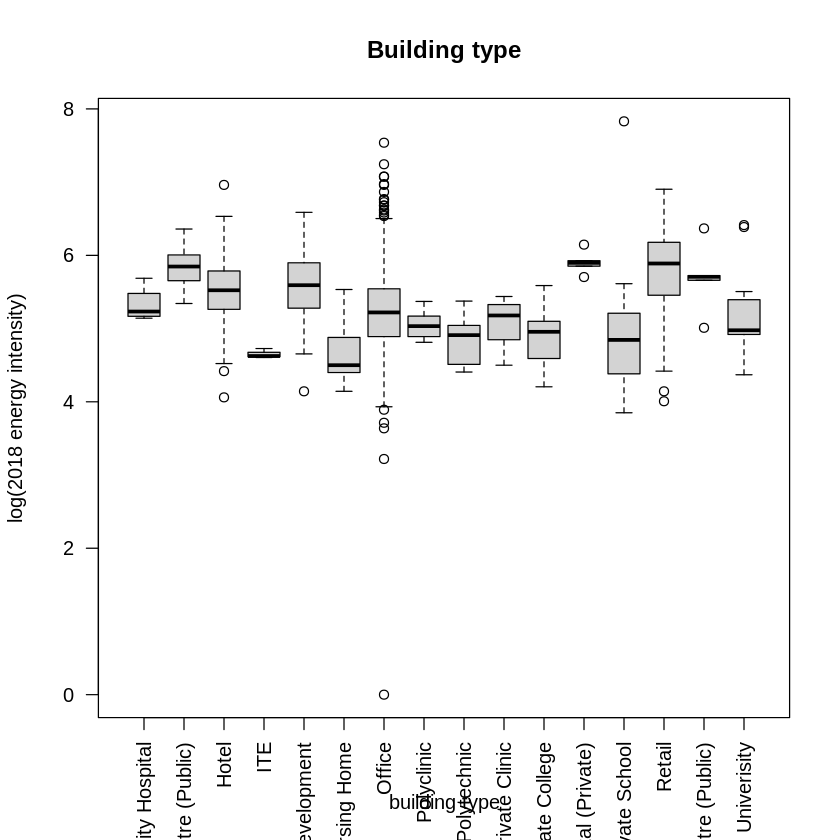

In [ ]:
boxplot(log(energy$X2018energyusintensity) ~ energy$buildingtype, las = 2,
        cex.names = 0.5, ylab = 'log(2018 energy intensity)', xlab = 'building type', main = 'Building type')

In [ ]:
summary(aov(log(energy$X2018energyusintensity) ~ factor(energy$buildingtype)))

                             Df Sum Sq Mean Sq F value Pr(>F)    
factor(energy$buildingtype)  15  67.54   4.503   14.06 <2e-16 ***
Residuals                   938 300.47   0.320                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
pairwise.t.test(log(energy$X2018energyusintensity), energy$buildingtype, p.adjust.method = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  log(energy$X2018energyusintensity) and energy$buildingtype 

                                             Community Hospital
General Hospital/ Specialist Centre (Public) 0.13693           
Hotel                                        0.53954           
ITE                                          0.12086           
Mixed Development                            0.41440           
Nursing Home                                 0.02773           
Office                                       0.73174           
Polyclinic                                   0.42101           
Polytechnic                                  0.20427           
Private Clinic                               0.48381           
Private College                              0.20685           
Private Hospital (Private)                   0.12587           
Private School                               0.21792           
Retail                                       0